## Used Car Price Prediction

There are id and 12 characteristics of cars and the price.

1. Id - Car's id
2. Name - The brand and model of the car.
3. Location - The location in which the car is being sold or is available for purchase.
4. Year - The year or edition of the model.
5. Kilometers_Driven - The total kilometers are driven in the car by the previous owner(s) in KM.
6. Fuel_Type - The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission - The type of transmission used by the car. (Automatic / Manual)
8. Owner_Type - First, Second, Third, or Fourth & Above
9. Mileage - The standard mileage offered by the car company in kmpl or km/kg
10. Engine - The displacement volume of the engine in CC.
11. Power - The maximum power of the engine in bhp.
12. Seats - The number of seats in the car.
13. New_Price - The price of a new car of the same model.
14. Price - The price of the car (target).

### Loading the dataset

In [52]:
import pandas as pd
import numpy as np

In [53]:
cars_df = pd.read_csv( "./data/usedcar.csv", index_col=[0] )

In [54]:
type(cars_df)

pandas.core.frame.DataFrame

### Showing few records

In [55]:
cars_df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Getting metadata

In [56]:
cars_df.shape

(6019, 13)

In [57]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


### Indexing and Slicing

In [58]:
cars_df[0:2]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


In [59]:
cars_df[-2:]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [60]:
cars_df[['Name', 'Price']][0:5]

,Name,Price
0,Maruti Wagon R LXI CNG,1.75
1,Hyundai Creta 1.6 CRDi SX Option,12.50
2,Honda Jazz V,4.50
3,Maruti Ertiga VDI,6.00
4,Audi A4 New 2.0 TDI Multitronic,17.74


## Finding Insights

### How many cars sold in each location?

In [61]:
#cars_df['Location'].value_counts()
cars_df.Location.value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

### What are different transmission types and how may cars are available from each transmission type?

In [62]:
#cars_df['Transmission'].value_counts()
cars_df.Transmission.value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [63]:
cars_df.Transmission.value_counts(normalize=True)*100

Manual       71.423825
Automatic    28.576175
Name: Transmission, dtype: float64

### What are different owner types and how may cars are available from each owner type?

In [64]:
#TODO by participants

### Plotting number of cars sold at each location

In [65]:
import matplotlib.pyplot as plt
import seaborn as sn

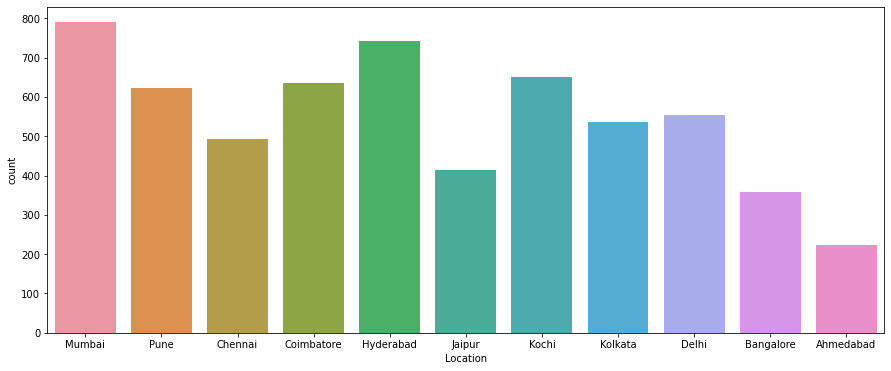

In [66]:
plt.figure(figsize=(15, 6))
sn.countplot( data = cars_df,
              x = 'Location');

### Top 10 most expensive cars

In [67]:
cars_df.sort_values('Price', ascending=False)[0:10]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33 kmpl,2993 CC,255 bhp,5.0,2.3 Cr,160.00
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.4 kmpl,5204 CC,560 bhp,2.0,NaN,120.00
5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.5 kmpl,5000 CC,488.1 bhp,2.0,NaN,100.00
1505,Land Rover Range Rover Sport SE,Kochi,2019,26013,Diesel,Automatic,First,12.65 kmpl,2993 CC,255 bhp,5.0,1.39 Cr,97.07
1974,BMW 7 Series 740Li,Coimbatore,2018,28060,Petrol,Automatic,First,12.05 kmpl,2979 CC,320 bhp,5.0,NaN,93.67
1984,BMW 7 Series 740Li,Bangalore,2017,17465,Petrol,Automatic,First,12.05 kmpl,2979 CC,320 bhp,5.0,NaN,93.00
4691,Mercedes-Benz SLK-Class 55 AMG,Bangalore,2014,3000,Petrol,Automatic,Second,12.0 kmpl,5461 CC,421 bhp,2.0,NaN,90.00
5535,BMW X6 xDrive 40d M Sport,Ahmedabad,2015,97003,Diesel,Automatic,First,15.87 kmpl,2993 CC,308.43 bhp,5.0,NaN,85.00
2095,Mercedes-Benz SLC 43 AMG,Coimbatore,2019,2526,Petrol,Automatic,First,19.0 kmpl,2996 CC,362.07 bhp,2.0,1.06 Cr,83.96
1885,Mercedes-Benz GLS 350d Grand Edition,Delhi,2018,6000,Diesel,Automatic,First,11.0 kmpl,2987 CC,258 bhp,7.0,1.02 Cr,79.00


In [68]:
#TODO: Find out top 10 least expensive cars

### What is the price range at which most cars were sold?

### Variable Types

Two variable types
- Numerical : quantify 
   - e.g. age, salary, sales
   - Two types
       - Continuous
       - Discrete : Specific values
           - e.g. Number of dependents
           - e.g. number of cars you own
- Categorical : 
    - e.g Sex/gender, survived vs. not survived, weedays

### Histogram for plotting Continuous Variables (Price)

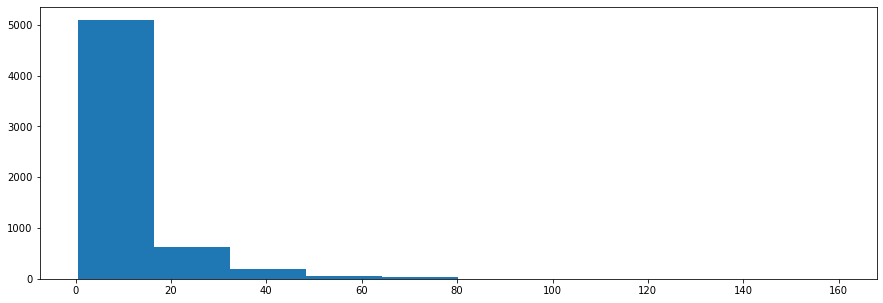

In [69]:
plt.figure(figsize=(15,5))
plt.hist(cars_df['Price']);

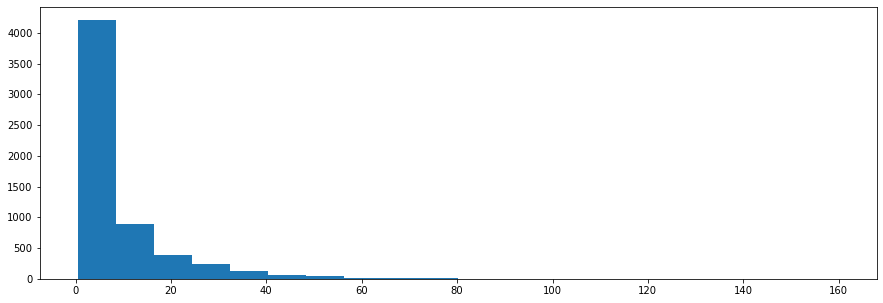

In [70]:
plt.figure(figsize=(15,5))
plt.hist(cars_df['Price'], bins = 20);

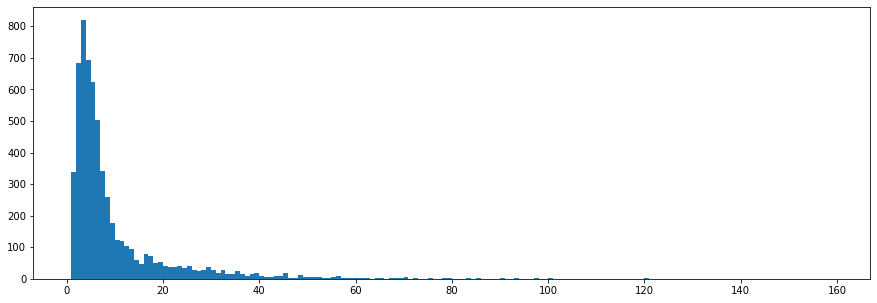

In [71]:
plt.figure(figsize=(15,5))
plt.hist(cars_df['Price'], bins=list(range(1, 160, 1)));

### What is Normal Distribution

References:

https://en.wikipedia.org/wiki/Normal_distribution

https://courses.lumenlearning.com/math4libarts/chapter/understanding-normal-distribution/

### Finding distribution parameters of Price

In [72]:
cars_df['Price'].mean()

9.479468350224273

In [73]:
cars_df['Price'].std()

11.187917112455484

### 95% of the cars were sold at which price?

In [74]:
from scipy import stats

In [75]:
stats.norm.interval(0.95,
                    cars_df['Price'].mean(),
                    cars_df['Price'].std())

(-12.448446252207834, 31.40738295265638)

### Price range at which most cars were sold?

In [76]:
stats.norm.interval(0.997,
                    cars_df['Price'].mean(),
                    cars_df['Price'].std())

(-23.7233375699902, 42.68227427043862)

### Outliers

Using 3 standard deviation approach.

In [77]:
cars_df[cars_df.Price > 43]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
134,Mercedes-Benz SLC 43 AMG,Kolkata,2017,13372,Petrol,Automatic,First,19.0 kmpl,2996 CC,362.07 bhp,2.0,95.04 Lakh,54.00
168,BMW X5 xDrive 30d,Mumbai,2015,41000,Diesel,Automatic,First,15.3 kmpl,2993 CC,258 bhp,5.0,NaN,45.00
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76
216,Audi A8 L 3.0 TDI quattro,Delhi,2012,56000,Diesel,Automatic,First,11.8 kmpl,2967 CC,246.7 bhp,5.0,NaN,45.00
264,Mercedes-Benz GLE 350d,Coimbatore,2017,29819,Diesel,Automatic,First,11.57 kmpl,2987 CC,254.79 bhp,5.0,95.13 Lakh,61.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5900,Mercedes-Benz GLC 220,Coimbatore,2017,50794,Diesel,Automatic,First,17.9 kmpl,2143 CC,170 bhp,5.0,NaN,43.30
5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.5 kmpl,5000 CC,488.1 bhp,2.0,NaN,100.00
5927,Audi Q5 3.0 TDI Quattro Technology,Coimbatore,2018,29091,Diesel,Automatic,First,13.22 kmpl,2967 CC,241.4 bhp,5.0,NaN,45.52
5946,BMW 5 Series 2013-2017 530d M Sport,Bangalore,2016,16000,Diesel,Automatic,First,14.69 kmpl,2993 CC,258 bhp,5.0,NaN,48.00


### Using box plot

Reference: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

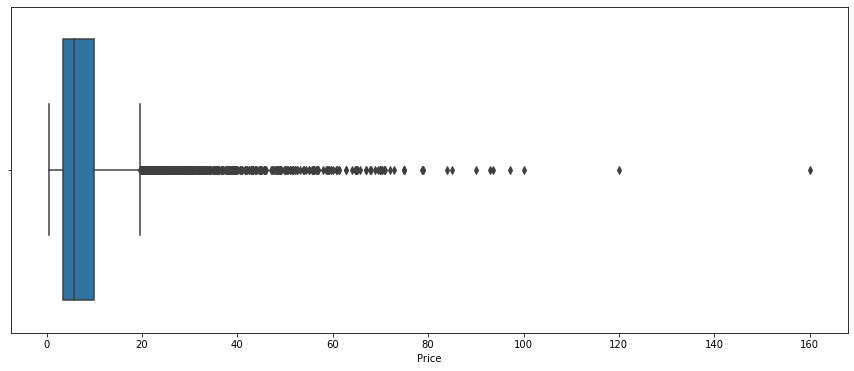

In [78]:
plt.figure(figsize=(15,6))
boxp = sn.boxplot(cars_df['Price']);

In [79]:
cars_df['Price'].median()

5.64

In [80]:
iqr = stats.iqr(cars_df['Price'])
iqr

6.449999999999999

In [81]:
cars_df['Price'].describe()

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

In [82]:
min_price = cars_df['Price'].describe()['25%'] - 1.5 * iqr
max_price = cars_df['Price'].describe()['75%'] + 1.5 * iqr

In [83]:
min_price, max_price

(-6.174999999999999, 19.625)

In [84]:
cars_df[cars_df.Price < 20]['Price'].shape

(5318,)

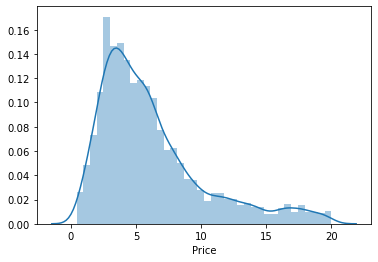

In [85]:
sn.distplot(cars_df[cars_df.Price < 20]['Price'])

### How many kilometers the cars were driven before being sold?

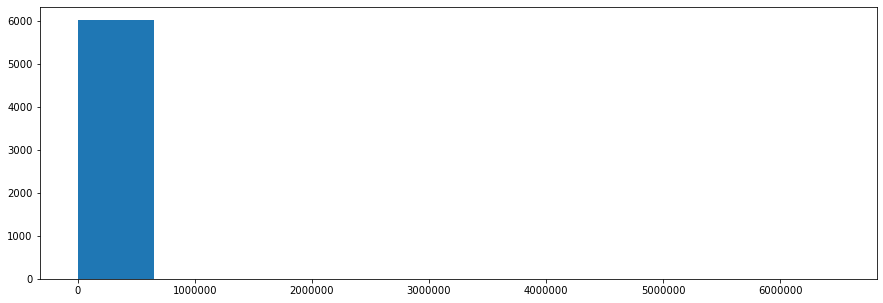

In [86]:
plt.figure(figsize=(15,5))
ax = plt.gca()
ax.xaxis.get_major_formatter().set_scientific(False)
plt.hist(cars_df['Kilometers_Driven']);

In [87]:
### TODO: Top 10 cars most driven 

In [88]:
### TODO: Top 10 cars least driven 

In [89]:
cars_df[cars_df.Kilometers_Driven > 600000].shape

(4, 13)

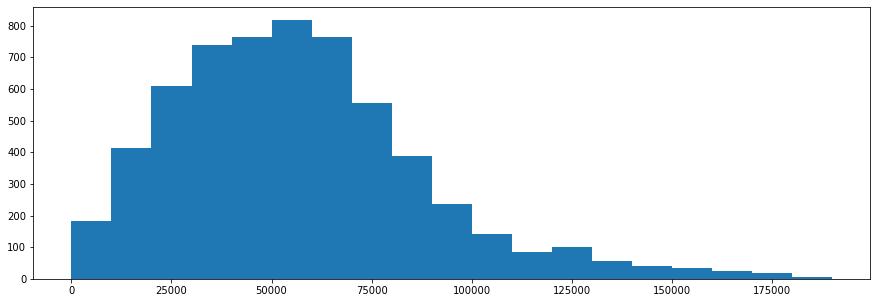

In [90]:
plt.figure(figsize=(15,5))
plt.hist(cars_df[cars_df.Kilometers_Driven < 200000]['Kilometers_Driven'],
         bins = range(0, 200000, 10000));

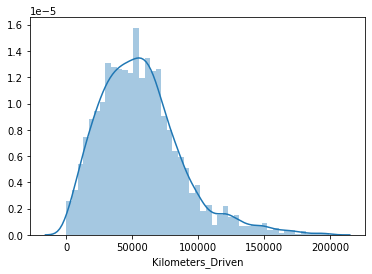

In [91]:
sn.distplot(cars_df[cars_df.Kilometers_Driven < 200000]['Kilometers_Driven']);

### Age of car

This is not the actual age of the car.

We are substracting the edition of the car from the current year.

In [92]:
cars_df['age'] = 2020 - cars_df['Year']

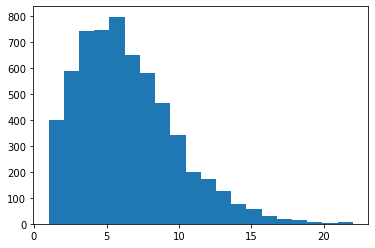

In [93]:
plt.hist(cars_df['age'], bins = 20);

In [94]:
### TODO: 95% o the cars sold were of what age?

### Different makes and models

We are assuming the first token to be the make and the second token to be the model.

In [95]:
cars_df['make'] = cars_df['Name'].map( lambda x: x.lower().split()[0] )

In [96]:
cars_df.make.value_counts()

maruti           1211
hyundai          1107
honda             608
toyota            411
mercedes-benz     318
volkswagen        315
ford              300
mahindra          272
bmw               267
audi              236
tata              186
skoda             173
renault           145
chevrolet         121
nissan             91
land               60
jaguar             40
fiat               28
mitsubishi         27
mini               26
volvo              21
porsche            18
jeep               15
datsun             13
isuzu               3
force               3
smart               1
bentley             1
ambassador          1
lamborghini         1
Name: make, dtype: int64

In [97]:
cars_df['model'] = cars_df['Name'].map( lambda x: x.lower().split(" ")[1] )

In [98]:
cars_df['model'].unique()

array(['wagon', 'creta', 'jazz', 'ertiga', 'a4', 'eon', 'micra', 'innova',
       'vento', 'indica', 'ciaz', 'city', 'swift', 'rover', 'pajero',
       'amaze', 'duster', 'new', '3', 's', 'a6', 'i20', 'alto', 'wrv',
       'corolla', 'ssangyong', 'vitara', 'kuv', 'm-class', 'polo', 'nano',
       'elantra', 'xcent', 'thar', 'grand', 'kwid', 'i10', 'x-trail',
       'zen', 'figo', 'c-class', 'cayenne', 'xuv500', 'terrano', 'brio',
       'fiesta', 'santro', 'zest', 'ritz', '5', 'fortuner', 'ecosport',
       'verna', 'go', 'omni', 'etios', 'xf', 'eeco', 'civic', 'v40', 'b',
       'scorpio', 'cr-v', 'slc', '1', 'beat', 'rapid', 'rs5', 'superb',
       'x5', 'glc', 'countryman', 'optra', 'lodgy', 'e-class', 'baleno',
       'laura', 'nuvosport', 'fabia', 'indigo', 'q3', 'octavia', 'a8',
       'verito', 'cooper', 'santa', 'x1', 'accent', 'tucson', 'gle',
       'a-star', 'grande', 'x3', 'q7', 'jetta', 'gla', 'celerio', 'sumo',
       'accord', '6', 'manza', 'spark', 'clubman', 'teana', '

In [99]:
len(cars_df['model'].unique())

211

In [100]:
cars_df['model'].value_counts()

swift      353
city       270
i20        247
verna      170
innova     164
          ... 
clubman      1
e            1
siena        1
venture      1
montero      1
Name: model, Length: 211, dtype: int64

### Top 10 reselling models

In [101]:
top_10_models = list(cars_df['model'].value_counts().index[0:10])

In [102]:
top_10_models

['swift',
 'city',
 'i20',
 'verna',
 'innova',
 'grand',
 'i10',
 'wagon',
 'polo',
 'alto']

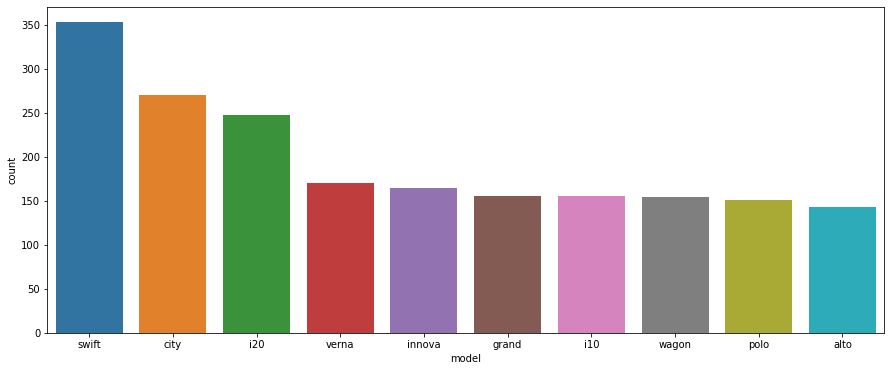

In [103]:
plt.figure(figsize=(15, 6))
sn.countplot(data = cars_df,
             x = 'model',
             order = top_10_models);

## Analyzing two variables

### What is sales price of cars of top 10 models looks like?

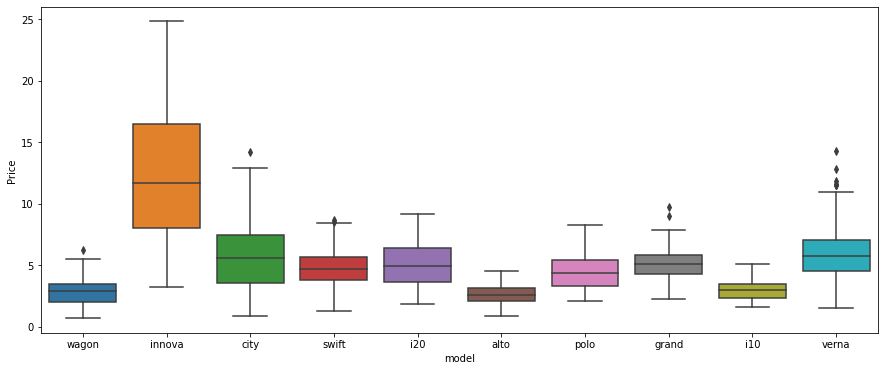

In [104]:
plt.figure(figsize=(15, 6))
sn.boxplot(data = cars_df[cars_df.model.isin(top_10_models)],
           x = 'model',
           y = 'Price' );

### Converting datatypes of columns

Engine capacity, power and mileage are not numerical values. We need to convert them to numerical values for analysis.

In [105]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
 13  age                6019 non-null   int64  
 14  make               6019 non-null   object 
 15  model              6019 non-null   object 
dtypes: float64(2), int64(3),

In [106]:
cars_df[0:2]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,age,make,model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,10,maruti,wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,5,hyundai,creta


In [107]:
import math

In [108]:
def get_float_val(x):
    if x is None:
        return None   
    
    val = str(x).split()[0]
    
    if val.replace(".","",1).isdigit():
        return float(val)        
    else:
        return None

In [109]:
cars_df['mileage_new'] = cars_df.Mileage.map(lambda x: get_float_val(x))

In [110]:
cars_df.mileage_new

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: mileage_new, Length: 6019, dtype: float64

In [111]:
cars_df['engine_new'] = cars_df.Engine.map(lambda x: get_float_val(x))
cars_df['power_new'] = cars_df.Power.map(lambda x: get_float_val(x))

In [112]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
 13  age                6019 non-null   int64  
 14  make               6019 non-null   object 
 15  model              6019 non-null   object 
 16  mileage_new        6017 

### How engine power and mileage is effecting price of the used cars?

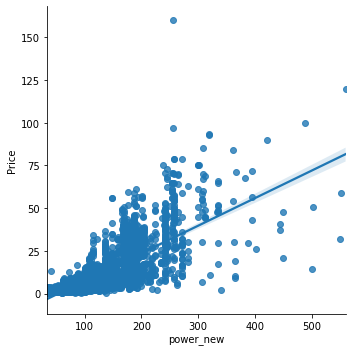

In [113]:
sn.lmplot(data = cars_df,
          x = 'power_new',
          y = 'Price');

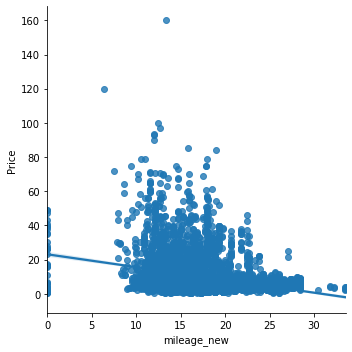

In [115]:
sn.lmplot(data = cars_df,
          x = 'mileage_new',
          y = 'Price');

In [116]:
cars_df[cars_df.mileage_new == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,age,make,model,mileage_new,engine_new,power_new
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,8,land,rover,0.0,2179.0,115.0
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0 kmpl,1950 CC,194 bhp,5.0,49.14 Lakh,35.67,1,mercedes-benz,c-class,0.0,1950.0,194.0
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,NaN,1.30,15,hyundai,santro,0.0,1086.0,NaN
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,2.95,13,honda,city,0.0,NaN,NaN
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,NaN,3.60,5,ford,figo,0.0,1498.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,0.0 kmpl,2446 CC,null bhp,8.0,NaN,2.20,19,toyota,qualis,0.0,2446.0,NaN
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0 kmpl,1950 CC,194 bhp,5.0,49.14 Lakh,35.00,1,mercedes-benz,c-class,0.0,1950.0,194.0
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0 kmpl,2112 CC,null bhp,6.0,NaN,1.70,18,mahindra,jeep,0.0,2112.0,NaN
5972,Hyundai Santro Xing GL,Mumbai,2008,65000,Petrol,Manual,Second,0.0 kmpl,1086 CC,62 bhp,5.0,NaN,1.39,12,hyundai,santro,0.0,1086.0,62.0


#### Note:

We will need to remove these cars from the analysis as they are incomplete or wrong samples.

In [119]:
cars_df[(cars_df.engine_new == 0) | (cars_df.engine_new == 0)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,age,make,model,mileage_new,engine_new,power_new


### Finding corrleation between multiple variables (numerical)

In [122]:
corr_mat = cars_df[['Price', 'mileage_new', 'engine_new', 'power_new', 'Kilometers_Driven']].corr()

In [123]:
corr_mat

,Price,mileage_new,engine_new,power_new,Kilometers_Driven
Price,1.000000,-0.306593,0.658354,0.772566,-0.011493
mileage_new,-0.306593,1.000000,-0.597699,-0.537729,-0.065253
engine_new,0.658354,-0.597699,1.000000,0.866185,0.091068
power_new,0.772566,-0.537729,0.866185,1.000000,0.033503
Kilometers_Driven,-0.011493,-0.065253,0.091068,0.033503,1.000000


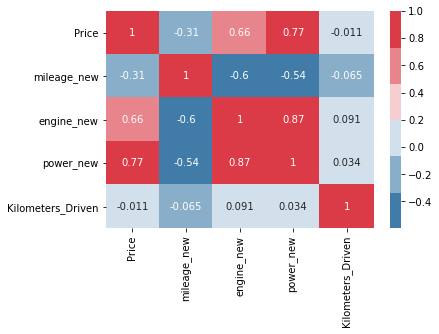

In [124]:
sn.heatmap(corr_mat,
           annot=True,
           cmap = sn.diverging_palette(240, 10));

#### Inferences

- Price, Kilometers_Driven are negative correlated to price
- engine capacity and power are positively correlatd to price

### How Kilometers Driven is effecting price of the used cars?

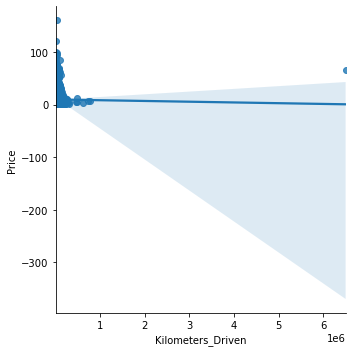

In [125]:
sn.lmplot(data = cars_df,
          x = 'Kilometers_Driven',
          y = 'Price');

### Remove outliers from the data

In [126]:
cars_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,age,make,model,mileage_new,engine_new,power_new
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,10,maruti,wagon,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,5,hyundai,creta,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,9,honda,jazz,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,8,maruti,ertiga,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,7,audi,a4,15.20,1968.0,140.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,6,maruti,swift,28.40,1248.0,74.00
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,5,hyundai,xcent,24.40,1120.0,71.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,8,mahindra,xylo,14.00,2498.0,112.00
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,7,maruti,wagon,18.90,998.0,67.10


In [127]:
cars_df.Kilometers_Driven.quantile(0.25)

34000.0

In [128]:
cars_df.Kilometers_Driven.quantile(0.75)

73000.0

In [129]:
def min_max_range(vals):
    iqr = vals.quantile(0.75) - vals.quantile(0.25)
    min_val = vals.quantile(0.25) - 1.5 * iqr
    max_val = vals.quantile(0.75) + 1.5 * iqr
    
    return min_val, max_val

In [130]:
min_km, max_km = min_max_range(cars_df.Kilometers_Driven)

In [131]:
min_km, max_km

(-24500.0, 131500.0)

In [132]:
min_price, max_price = min_max_range(cars_df.Price)

In [133]:
min_price, max_price

(-6.174999999999999, 19.625)

In [134]:
new_cars_df = cars_df[(cars_df.Kilometers_Driven <= max_km) &
                      (cars_df.Price <= max_price) &
                      (cars_df.mileage_new > 0.00)]

In [135]:
new_cars_df.shape

(5052, 19)

In [136]:
new_corr_mat = new_cars_df[['Price', 
                            'mileage_new', 
                            'engine_new', 
                            'power_new', 
                            'Kilometers_Driven']].corr()

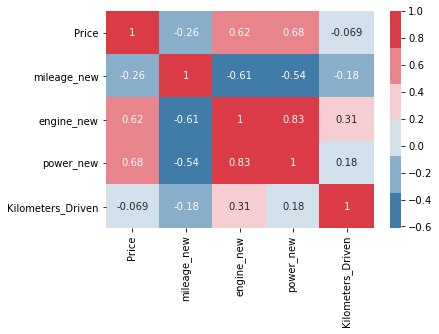

In [137]:
sn.heatmap(new_corr_mat,
           annot=True,
           cmap = sn.diverging_palette(240, 10));

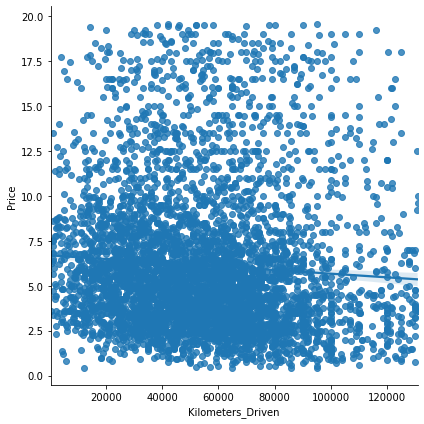

In [138]:
sn.lmplot(data = new_cars_df,
          x = 'Kilometers_Driven',
          y = 'Price',
          height=6);

In [153]:
new_cars_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'age', 'make', 'model', 'mileage_new',
       'engine_new', 'power_new'],
      dtype='object')

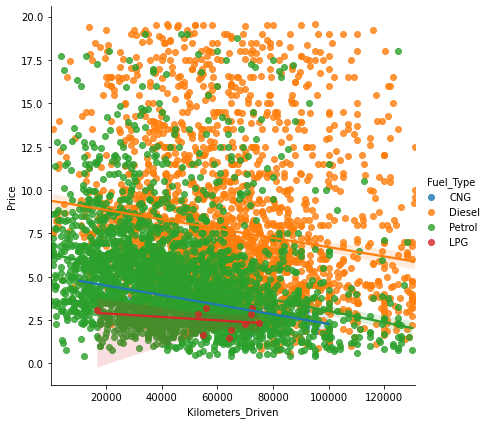

In [157]:
sn.lmplot(data = new_cars_df,
          x = 'Kilometers_Driven',
          y = 'Price',
          hue = 'Fuel_Type',                  
          height=6);

### Location Vs. Transmission or Fuel Type

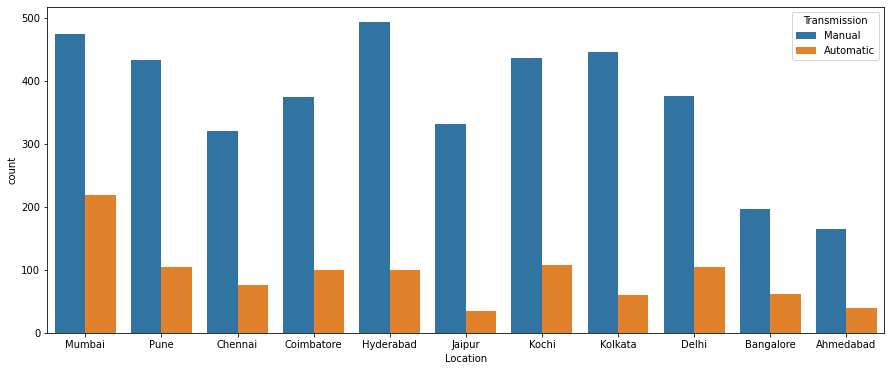

In [141]:
plt.figure(figsize=(15, 6))
sn.countplot( data = new_cars_df,
              x = 'Location',
              hue = 'Transmission');
plt.savefig("location.png")

In [142]:
pd.crosstab(new_cars_df.Location,
            new_cars_df.Transmission,
            normalize='index') * 100

Transmission,Automatic,Manual
Location,,
Ahmedabad,23.853211,76.146789
Bangalore,33.015873,66.984127
Chennai,21.615721,78.384279
Coimbatore,27.118644,72.881356
Delhi,26.112186,73.887814
Hyderabad,21.802326,78.197674
Jaipur,11.940299,88.059701
Kochi,25.335570,74.664430
Kolkata,13.523810,86.476190


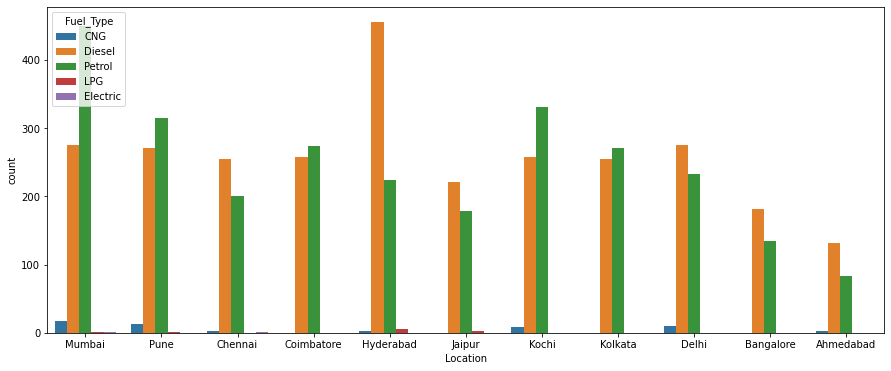

In [144]:
plt.figure(figsize=(15, 6))
sn.countplot( data = new_cars_df,
              x = 'Location',
              hue = 'Fuel_Type');

### Does Manual cars have better mileage than Automatic Cars

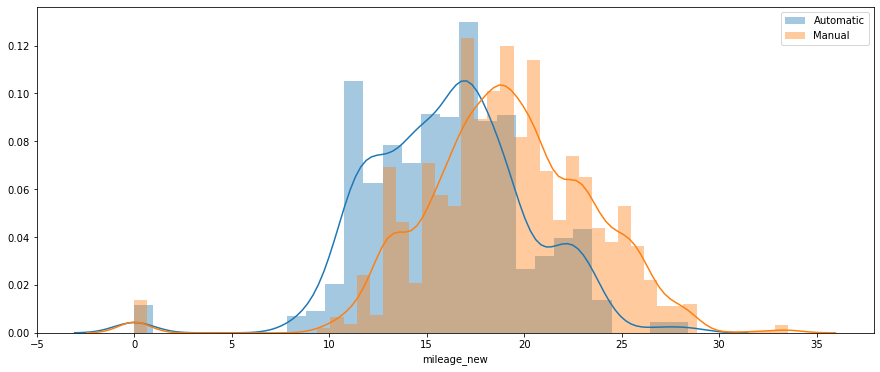

In [161]:
plt.figure(figsize=(15, 6))
sn.distplot(new_cars_df[new_cars_df.Transmission == 'Automatic']['mileage_new'], label = 'Automatic')
sn.distplot(new_cars_df[new_cars_df.Transmission == 'Manual']['mileage_new'], label = 'Manual')
plt.legend();

### Saving the dataset (with new features) 

In [140]:
new_cars_df.to_csv( "new_used_car.csv", index = False )

### Tasks to be completed by participants at the end of this module.
1. How many cars sold for each fuel types (petrol, diesel etc.) in terms of percentage?

2. Plot the number of cars sold for each of years of car edition (Year) using count plot.

3. Draw histgram to depict the mileage of difference cars.

4. Find 95% of the cars sold have power (bhp) in what range. Any outliers in terms of power?

5. What is the correlation between New_Price and price. Take only those samples that have New_Price data available.

```
    Note: Drop the records where new price of the cars are not mentioned using the following:

    df1 = cars_df[['New_Price', 'Price']].dropna()
``` 

6. What does the the kilometers driven by top 10 models looks like? (Use box plots across models for comparison)

7. What is the corrleation between 'Price', 'mileage_new', 'engine_new', 'power_new', 'Kilometers_Driven' for a only Maruti models?

8. Compare the sold price of cars in Mumbai and Kochi for maruti models only using overlapped distribtion plot and make an inference.

9. Find out top 5 makes (most number of cars sold) in used cars with sold price less than 5 lakhs.
10. Find out any interesting insights of your choice (one or two).